<a href="https://colab.research.google.com/github/nikeshgamal24/House-Price-Prediction-Project/blob/main/House_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [49]:
## Data Collection
df = pd.read_csv("Housing.csv")

In [50]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [52]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [53]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [54]:
## checking for duplicate records
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
540,False
541,False
542,False
543,False


In [55]:
## checking for duplicate records
df[df.duplicated()]  ## no duplicate records

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [56]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [57]:
df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [58]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [60]:
df['area'].dtype

dtype('int64')

In [61]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_feature

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [62]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_feature

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [63]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique())<25]
discrete_feature

['bedrooms', 'bathrooms', 'stories', 'parking']

In [64]:
df['bathrooms'].unique() ## < 25

array([2, 4, 1, 3])

In [65]:
df['area'].unique() ## < 25

array([ 7420,  8960,  9960,  7500,  8580, 16200,  8100,  5750, 13200,
        6000,  6550,  3500,  7800,  6600,  8500,  4600,  6420,  4320,
        7155,  8050,  4560,  8800,  6540,  8875,  7950,  5500,  7475,
        7000,  4880,  5960,  6840,  7482,  9000,  6360,  6480,  4300,
        7440,  6325,  5150, 11440,  7680,  8880,  6240, 11175,  7700,
       12090,  4000,  5020,  4040,  4260,  6500,  5700, 10500,  3760,
        8250,  6670,  3960,  7410,  5000,  6750,  4800,  7200,  4100,
        6400,  6350,  4500,  5450,  3240,  6615,  8372,  9620,  6800,
        8000,  6900,  3700,  7020,  7231,  6254,  7320,  6525, 15600,
        7160, 11460,  5828,  5200,  5400,  4640,  5800,  6660,  4700,
        5136,  4400,  3300,  3650,  6100,  2817,  7980,  3150,  6210,
        6825,  6710,  6450, 10269,  8400,  5300,  3800,  9800,  8520,
        6050,  7085,  3180,  3410,  3000, 11410,  5720,  3540,  7600,
       10700,  8150,  4410,  7686,  2800,  5948,  4200,  4520,  4095,
        4120,  4770,

In [66]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
continuous_feature

['price', 'area']

In [67]:
print(f"Numerical Features: {numerical_feature}")
print(f"Length of numerical features: {len(numerical_feature)}")
print(f"Categorical Features: {categorical_feature} ")
print(f"Length of categorical feature: {len(categorical_feature)}")
print(f"Discrete Features: {discrete_feature}")
print(f"Length of discrete feature: {len(discrete_feature)}")
print(f"Continuous Features: {continuous_feature}")
print(f"Length of continuous featue: {len(continuous_feature)}")


Numerical Features: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Length of numerical features: 6
Categorical Features: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'] 
Length of categorical feature: 7
Discrete Features: ['bedrooms', 'bathrooms', 'stories', 'parking']
Length of discrete feature: 4
Continuous Features: ['price', 'area']
Length of continuous featue: 2


In [68]:
### Independent Feature and Dependent Feature
## independent feature
X = df.drop(["price"],axis=1)


In [69]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [70]:
## independent feature
y = df["price"]
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [71]:
## independent feature
y = df["price"]
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [72]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape
y_train.shape,y_test.shape

((436,), (109,))

In [73]:
## Create Column Transformer with 3 types of transformer i.e. StandardScaler() , OneHotEncoder(), ColumnTransformer()
### numerical feature from independent features
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns



In [74]:
## transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

oh_encoder = OneHotEncoder(drop='first')
std_scaler = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("One Hot Encoder",oh_encoder,cat_features),
        ("StandardScaler",std_scaler,num_features)
    ]
)

In [75]:
preprocessor

ColumnTransformer(transformers=[('One Hot Encoder', OneHotEncoder(drop='first'),
                                 Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object'))])

In [76]:
## applying the transformation to the training dataset (fit_transform)
# Fit the preprocessor ONLY on the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the *fitted* preprocessor (do NOT fit again!)
X_test_transformed = preprocessor.transform(X_test)

In [77]:
temp_df=pd.DataFrame(X_train_transformed)

In [78]:
temp_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.104378,0.057313,-0.026148,0.128881,0.225002,-0.003528,-0.134654,0.291014,0.003872,0.048138,0.118688,0.196238
1,0.104378,1.000000,0.400636,-0.025583,0.155998,0.180266,0.028601,-0.109696,0.175797,0.081881,0.090957,0.048842,0.031599
2,0.057313,0.400636,1.000000,0.002808,0.093903,0.220449,0.055398,-0.144493,0.040558,0.092501,0.085245,-0.184271,0.044927
3,-0.026148,-0.025583,0.002808,1.000000,-0.130844,-0.053136,0.032028,-0.043178,-0.004422,0.026769,0.047174,0.021927,0.060281
4,0.128881,0.155998,0.093903,-0.130844,1.000000,0.089846,-0.047977,-0.108216,0.215263,0.203194,0.212131,0.325929,0.192711
5,0.225002,0.180266,0.220449,-0.053136,0.089846,1.000000,0.011141,-0.082288,0.207853,0.074064,0.009798,-0.004900,0.095486
6,-0.003528,0.028601,0.055398,0.032028,-0.047977,0.011141,1.000000,-0.589356,0.005502,0.035722,0.038671,-0.021812,0.027514
7,-0.134654,-0.109696,-0.144493,-0.043178,-0.108216,-0.082288,-0.589356,1.000000,-0.114430,-0.108112,-0.128998,-0.104622,-0.161725
8,0.291014,0.175797,0.040558,-0.004422,0.215263,0.207853,0.005502,-0.114430,1.000000,0.154674,0.199208,0.070472,0.337417
9,0.003872,0.081881,0.092501,0.026769,0.203194,0.074064,0.035722,-0.108112,0.154674,1.000000,0.391447,0.405104,0.141470


<Axes: >

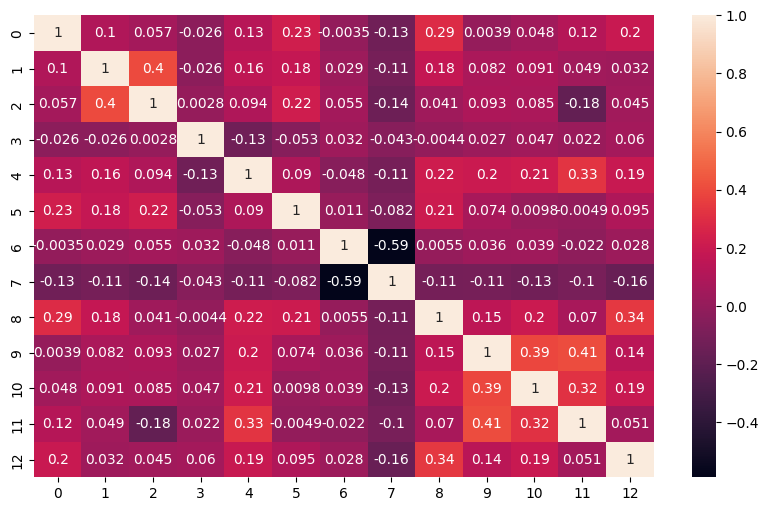

In [79]:
plt.figure(figsize=(10,6))
sns.heatmap(temp_df.corr(),annot=True)

In [80]:
## Model Training
### Model Evaluation

In [81]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,recall_score,precision_score


In [82]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [83]:
## create dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression":Ridge(),
    "Lasso Regression":Lasso(),
    "Kneighbor Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

## looping for each model ,predicting the values and model evaluation
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed,y_train) ## model training

    ## Make Predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    # print(y_train_pred)
    # print(y_test_pred)

    ## model evaluation on train dataset
    model_train_mae,model_train_rmse, model_train_r2= evaluate_model(y_train,y_train_pred)

    ## model evaluation on test dataset
    model_test_mae,model_test_rmse, model_test_r2= evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 984051.9237
- Mean Absolute Error: 719242.8937
- R2 Score: 0.6859
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1324506.9601
- Mean Absolute Error: 970043.4039
- R2 Score: 0.6529


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 984097.7713
- Mean Absolute Error: 718437.6574
- R2 Score: 0.6859
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1326096.0987
- Mean Absolute Error: 971370.2374
- R2 Score: 0.6521


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 984051.9237
- Mean Absolute Error: 719242.3173
- R2 Score: 0.6859
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1324508.1605
- Mean Absolute Error: 970044.0921
- R2 Score: 0.6529


Kneighbor Regressor
Model performance for Training set
- Root Mean Squared Err

In [84]:
## Hyper parameter tunning
### RandomizedCV
#Initialize few parameter for Hyperparamter tuning
dt_params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30], # 'None' means unlimited depth
    'min_samples_split': [2, 5, 10, 20],
    # 'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2', 0.8, 0.5], # 0.8 means 80% of features
    # 'max_leaf_nodes': [None, 10, 20, 30, 50],
    # 'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.05, 0.1,0.0005]
}

rf_params={
    'n_estimators': [100, 200, 300, 500], # Number of trees in the forest
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 10, 20, 30], # None means unlimited depth
    'min_samples_split': [2, 5, 10],
    'max_features': [1.0, 'sqrt', 'log2', 0.8], # For Random Forest, 'sqrt' (or 0.33) is often a good default
    # 'bootstrap': [True, False], # Whether bootstrap samples are used when building trees
    # 'oob_score': [False], # Usually set to True if you want to use OOB samples to estimate the generalization accuracy
    # 'ccp_alpha': [0.0, 0.001, 0.01], # Cost-Complexity Pruning
    # 'max_samples': [None, 0.7, 0.9], # If bootstrap=True, this sets the fraction of samples to draw. Not always tuned initially.
    # 'max_leaf_nodes': [None, 20, 50], # Less common to tune heavily if max_depth is tuned.
    # 'min_impurity_decrease': [0.0, 0.01], # Less common to tune heavily if others are used for regularization.
}

adb_params={
    'n_estimators': [50, 100, 200, 300, 500], # Number of boosting stages (weak learners)
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0], # Shrinks the contribution of each estimator
    'loss': ['linear', 'square', 'exponential'], # Type of loss function to use
    # 'estimator': [ # The base estimator. Often a DecisionTreeRegressor.
    #     # Define base estimators with various depths. Shallow trees are common for AdaBoost.
    #     DecisionTreeRegressor(max_depth=1), # Very common: "stumps"
    #     DecisionTreeRegressor(max_depth=2),
    #     DecisionTreeRegressor(max_depth=3),
    #     # You could also try other simple models here, but Decision Trees are standard.
    # ],
}

In [85]:
# Models list for Hyperparameter tuning
randomcv_models=[
    ("Decision Tree",DecisionTreeRegressor(),dt_params),
    ("Random Forest",RandomForestRegressor(),rf_params),
    ("Ada Boost",AdaBoostRegressor(),adb_params)
]

In [87]:
### Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        n_jobs=-1,
    )
    random.fit(X_train_transformed,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-------------------Best Paramters for {model_name}-----------------------------")
    print(model_param[model_name])

-------------------Best Paramters for Decision Tree-----------------------------
{'splitter': 'best', 'min_samples_split': 20, 'max_features': 0.5, 'max_depth': 20, 'criterion': 'squared_error', 'ccp_alpha': 0.0}
-------------------Best Paramters for Random Forest-----------------------------
{'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'absolute_error'}
-------------------Best Paramters for Ada Boost-----------------------------
{'n_estimators': 200, 'loss': 'exponential', 'learning_rate': 0.05}


In [89]:
## create dictionary of models
models = {
    "Decision Tree Regressor":DecisionTreeRegressor(splitter = 'best',
                                                    min_samples_split = 20,
                                                    max_features = 0.5,
                                                    max_depth = 20,
                                                    criterion = 'squared_error',
                                                    ccp_alpha = 0.0),
    "Random Forest Regressor":RandomForestRegressor(
                                                    n_estimators = 100,
                                                    min_samples_split = 5,
                                                    max_features = 'log2',
                                                    max_depth = 10,
                                                    criterion = 'absolute_error',
                                                   ),
    "AdaBoost Regressor": AdaBoostRegressor(
        n_estimators = 200, loss  = 'exponential', learning_rate = 0.05
    )
}

## looping for each model ,predicting the values and model evaluation
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed,y_train) ## model training

    ## Make Predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    # print(y_train_pred)
    # print(y_test_pred)

    ## model evaluation on train dataset
    model_train_mae,model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)

    ## model evaluation on test dataset
    model_test_mae,model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Decision Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 967222.8842
- Mean Absolute Error: 689898.7663
- R2 Score: 0.6966
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1769953.0119
- Mean Absolute Error: 1313827.3008
- R2 Score: 0.3802


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 714196.1512
- Mean Absolute Error: 490359.6162
- R2 Score: 0.8346
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1424757.3594
- Mean Absolute Error: 1013514.5486
- R2 Score: 0.5984


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 977794.7686
- Mean Absolute Error: 759522.5184
- R2 Score: 0.6899
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1532215.0509
- Mean Absolute Error: 1167599.7249
- R2 Score: 0.5355


